<a href="https://colab.research.google.com/github/AndriiVasylenkoML/tensorflow/blob/main/lab6_cats_v_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training with a Larger Dataset - Cats and Dogs

In the previous lab you trained a classifier with a horses-v-humans dataset. You saw that despite getting great training results, when you tried to do classification with real images, there were many errors, due primarily to overfitting -- where the network  does very well with data that it has previously seen, but poorly with data it hasn't!

In this lab you'll look at a real, and very large dataset, and see the impact this has to avoid overfitting.

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/details.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2024-12-20 11:52:07--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.29.22.44, 2600:1406:5600:790::317f, 2600:1406:5600:78b::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.29.22.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   174MB/s    in 5.1s    

2024-12-20 11:52:12 (155 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [4]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [15]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    print("training_length = int(len(files) * SPLIT_SIZE) ",training_length, len(files),SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    print("testing_length = int(len(files) - training_length) ",len(files) - training_length, len(files), testing_length)
    shuffled_set = random.sample(files, len(files))
    print("shuffled_set = random.sample(files, len(files))", random.sample(files, len(files)), files, len(files))
    training_set = shuffled_set[0:training_length]
    print("training_set = shuffled_set[0:training_length] ", shuffled_set[0:training_length])
    testing_set = shuffled_set[-testing_length:]
    print("testing_set = shuffled_set[-testing_length:] ", shuffled_set[-testing_length:])

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
training_length = int(len(files) * SPLIT_SIZE)  11250 12500 0.9
testing_length = int(len(files) - training_length)  1250 12500 1250
shuffled_set = random.sample(files, len(files)) ['569.jpg', '11709.jpg', '5952.jpg', '5218.jpg', '2199.jpg', '3287.jpg', '931.jpg', '7589.jpg', '9798.jpg', '8618.jpg', '1281.jpg', '9977.jpg', '11288.jpg', '11800.jpg', '9577.jpg', '3923.jpg', '11558.jpg', '8693.jpg', '10088.jpg', '3199.jpg', '9506.jpg', '10009.jpg', '4162.jpg', '220.jpg', '7993.jpg', '10891.jpg', '1838.jpg', '1718.jpg', '291.jpg', '8729.jpg', '340.jpg', '4025.jpg', '9745.jpg', '2037.jpg', '1834.jpg', '5517.jpg', '3404.jpg', '4719.jpg', '5542.jpg', '11801.jpg', '2806.jpg', '9153.jpg', '3212.jpg', '8139.jpg', '6365.jpg', '9747.jpg', '9383.jpg', '222.jpg', '499.jpg', '10399.jpg', '5775.jpg', '11176.jpg', '3772.jpg', '7806.jpg', '862.jpg', '118.jpg', '1795.jpg', '7012.jpg', '8959.jpg', '2077.jpg', '409.jpg', '9364.jpg', '9082.jpg', '6436.jpg', '12268.jpg', '

In [6]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])


In [22]:

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 24997 images belonging to 2 classes.
Found 8624 images belonging to 2 classes.


In [23]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=15, steps_per_epoch=90,
                    validation_data=validation_generator, validation_steps=6)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/90 ━━━━━━━━━━━━━━━━━━━━ 31s 435ms/step - acc: 0.5082 - loss: 0.7303

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


90/90 ━━━━━━━━━━━━━━━━━━━━ 59s 586ms/step - acc: 0.5331 - loss: 0.7031 - val_acc: 0.5047 - val_loss: 0.6839
Epoch 2/15
10/90 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - acc: 0.5548 - loss: 0.6792

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - acc: 0.5811 - loss: 0.6736 - val_acc: 0.6307 - val_loss: 0.6402
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 504ms/step - acc: 0.6194 - loss: 0.6549 - val_acc: 0.7193 - val_loss: 0.5475
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - acc: 0.6611 - loss: 0.6280 - val_acc: 0.6533 - val_loss: 0.6196
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 496ms/step - acc: 0.6867 - loss: 0.5891 - val_acc: 0.6913 - val_loss: 0.5674
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 35s 388ms/step - acc: 0.6904 - loss: 0.5743 - val_acc: 0.7687 - val_loss: 0.4936
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 506ms/step - acc: 0.7339 - loss: 0.5311 - val_acc: 0.7527 - val_loss: 0.4961
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.7509 - loss: 0.4958 - val_acc: 0.7113 - val_loss: 0.5479
Epoch 9/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 498ms/step - acc: 0.7673 - loss: 0.4848 - val_acc: 0.7787 - val_loss: 0.4826
Epoch 10/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.7315

<Figure size 640x480 with 0 Axes>

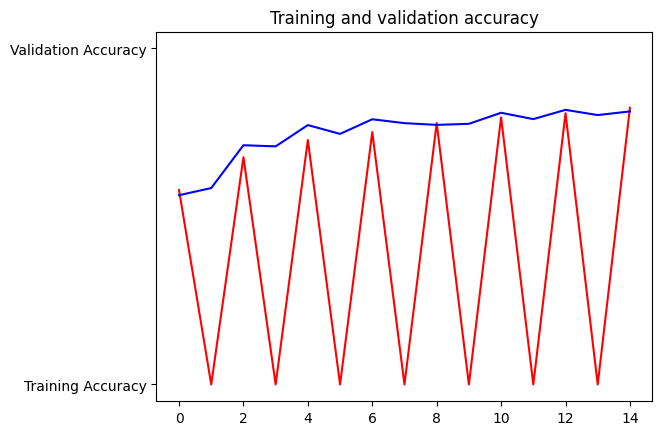

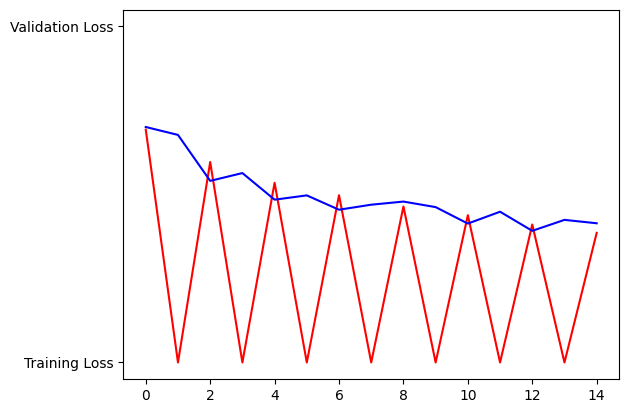

<Figure size 640x480 with 0 Axes>

In [10]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [18]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
    path = '/content/' + fn
    print("path = ", path, '/content/', fn)
    img = image.load_img(path, target_size=(150, 150))
    print(f"""
    img = image.load_img(path, target_size=(150, 150))
    {img}
    """)
    x = image.img_to_array(img)
    print(f"""
    x = image.img_to_array(img)
    {x}
    """)
    x = np.expand_dims(x, axis=0)
    print(f"""
    x = np.expand_dims(x, axis=0)
    {x}
    """)


    images = np.vstack([x])
    print(f"""
    images = np.vstack([x])
    {images}
    """)
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

Saving 0.jpg to 0 (3).jpg
path =  /content/0 (3).jpg /content/ 0 (3).jpg

    img = image.load_img(path, target_size=(150, 150))
    <PIL.Image.Image image mode=RGB size=150x150 at 0x798C669D50F0>
    

    x = image.img_to_array(img)
    [[[117. 115. 126.]
  [109. 107. 121.]
  [110. 108. 122.]
  ...
  [138. 140. 152.]
  [133. 135. 147.]
  [133. 133. 143.]]

 [[119. 117. 128.]
  [111. 109. 123.]
  [111. 109. 123.]
  ...
  [139. 141. 153.]
  [136. 138. 150.]
  [136. 136. 146.]]

 [[122. 120. 131.]
  [115. 113. 127.]
  [116. 114. 128.]
  ...
  [141. 143. 155.]
  [139. 141. 153.]
  [138. 141. 150.]]

 ...

 [[ 68.  75.  81.]
  [ 78.  83.  87.]
  [ 70.  78.  81.]
  ...
  [ 69.  76.  82.]
  [ 62.  69.  77.]
  [ 65.  73.  76.]]

 [[ 70.  75.  79.]
  [ 68.  76.  79.]
  [ 67.  77.  79.]
  ...
  [ 58.  65.  73.]
  [ 70.  77.  85.]
  [ 80.  88.  91.]]

 [[ 68.  73.  77.]
  [ 68.  76.  79.]
  [ 62.  72.  74.]
  ...
  [ 83.  90.  98.]
  [ 82.  89.  97.]
  [ 67.  75.  78.]]]
    

    x = np.expand